# Research stat arbitrage between ETC, LTC in comparison with BTC

In [1]:
import pandas as pd
import statsmodels.api as sm
pd.set_option('display.precision', 10)

import matplotlib.pyplot as plt

/home/vampire/PycharmProjects/mikasa_ed/venv/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_etc = pd.read_csv('../datasets/day/BTC_ETC.csv', index_col=0)
df_etc.head()

,open,high,low,close
datetime,,,,
1473552000,0.00227029,0.00229495,0.00215000,0.00219000
1473638400,0.00219000,0.00222336,0.00215000,0.00217421
1473724800,0.00217421,0.00218897,0.00210000,0.00211029
1473811200,0.00211029,0.00214594,0.00205000,0.00211010
1473897600,0.00211010,0.00215000,0.00208886,0.00210201


In [3]:
df_ltc = pd.read_csv('../datasets/day/BTC_LTC.csv', index_col=0)
df_ltc.head()

,open,high,low,close
datetime,,,,
1473552000,0.00636113,0.00649578,0.00630037,0.00639760
1473638400,0.00641250,0.00641348,0.00620600,0.00629999
1473724800,0.00626755,0.00633882,0.00624042,0.00628568
1473811200,0.00628568,0.00632182,0.00622000,0.00625933
1473897600,0.00625859,0.00633303,0.00623253,0.00628119


In [4]:
df_etc['open'].corr(df_ltc['open'])

0.85470384051488213

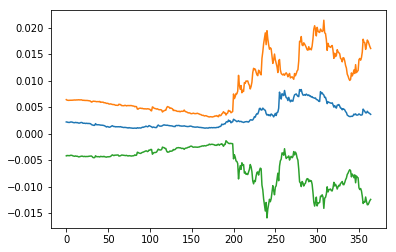

In [5]:
X = df_etc['close'].values
Y = df_ltc['close'].values
Z = X - Y
plt.plot(X)
plt.plot(Y)
plt.plot(Z)
plt.show()

In [6]:
hedge_ratio = sm.OLS(Y, X).fit()

In [7]:
hedge_ratio = hedge_ratio.params[0]

In [8]:
spread = Y - hedge_ratio * X

In [9]:
spread.shape

(365,)

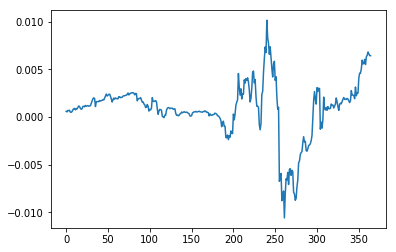

In [10]:
plt.plot(spread)
plt.show()

In [11]:
zscore = ((spread - spread.mean()) / spread.std())

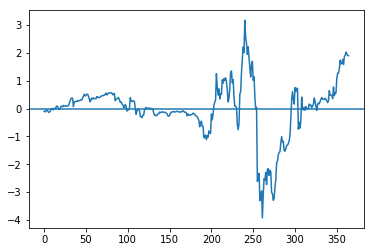

In [12]:
plt.plot(zscore)
plt.axhline(0)
plt.show()